<a href="https://colab.research.google.com/github/OfficialMuditsinha/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b> Summary

The backbone of multimillion dollar company airnb is data analysis. Here we are having a dataset with 49000 observation in it classified into 16 different columns as a mixture of catagorical as well as numerical variables. The task is to do a exploratory data analysis and get some valuable insights.
The data consist of the following columns:

**id=** Identification number assigned.

**Name=** Name of the lodge/rentals.

**host_id=** Identification number for hosts.

**neighbourhood_group=** Locality where the accomodation is located

**neighbourhood=**Area where the lodge/rentals are located.

**latitude and longitude=**Geographical coordinates of a location in the map.

**room_type=**The type of room the customer is booking.

**Price=**The price of the room.

**minimum_nights=**Minimum number of nights for which lodge/rentals are getting booked.

**number_of_reviews=** Number of reviews received by the lodge/rental.

**last_review=** Date when the last review was received.

**reviews_per_month=** Number of reviews received per month.

**calculated_host_listings_count=** tells us the number of times that particular host has used airbnb in that dataset.

**availability_365=** an indicator of the total number of days the listing is available for during the year.







## <b> Mounting Google Drive

In [ ]:
#Let's set the path for our dataset.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Importing Libraries

In [ ]:
#Friends who will help in the process.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


## <b> Importing Dataframe

In [ ]:
#Hello dataset
df=pd.read_csv("/content/drive/MyDrive/Airbnb Bookings Analysis-Mudit Prakash/Airbnb NYC 2019.csv")

## <b> DataFrame Head

In [ ]:
#First five entries in our datset.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## <b> DataFrame Tail

In [ ]:
#Last five entries in our dataset.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## <b> DataFrame Summary

In [ ]:
#calculating some statical data.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## <b> Data Dictionary

In [ ]:
# helper function
def count_blanks(column):
    count = 0
    for thing in column:
        if not thing:
            count += 1
    return count

In [ ]:
#df.head()

In [ ]:
#grouping the columns as per the data type
data_strings = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type',]
data_numbers = ['id','host_id','price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count','availability_365']
data_latlong = ['latitude', 'longitude']
data_dates = ['last_review',]
data_float = ['reviews_per_month']

In [ ]:
#develping the data dictionary
data_dictionary = pd.DataFrame(index=df.columns, columns=['missing_vals', 'blanks', 'type', 'description'])
for name in df.columns:
    data_dictionary.loc[name,'missing_vals'] = df[name].isna().sum()
    data_dictionary.loc[name,'blanks'] = count_blanks(df[name])



In [ ]:
#Mentioning the datatypes
data_dictionary.loc[data_strings,'type'] = 'string'
data_dictionary.loc[data_numbers,'type'] = 'int'
data_dictionary.loc[data_latlong,'type'] = 'float'
data_dictionary.loc[data_dates,'type'] = 'int'
data_dictionary.loc[data_float,'type'] = 'float'

In [ ]:
data_dictionary

,missing_vals,blanks,type,description
id,0,0,int,NaN
name,16,0,string,NaN
host_id,0,0,int,NaN
host_name,21,0,string,NaN
neighbourhood_group,0,0,string,NaN
neighbourhood,0,0,string,NaN
latitude,0,0,float,NaN
longitude,0,0,float,NaN
room_type,0,0,string,NaN
price,0,11,int,NaN


In [ ]:
#df.head()

In [ ]:
#data description
data_dictionary.loc['id','description'] = 'Identification number assigned'
data_dictionary.loc['name','description'] = 'Name of the lodge/rentals'
data_dictionary.loc['host_id','description'] = 'Id assigned to host'
data_dictionary.loc['host_name','description'] = 'Name of the host'
data_dictionary.loc['neighbourhood_group','description'] = 'Locality where the accomodation is located'
data_dictionary.loc['neighbourhood','description'] = 'Area where the accomodation is located'
data_dictionary.loc['latitude','description'] = 'Geographical coordinates'
data_dictionary.loc['longitude','description'] = 'Geographical coordinates'
data_dictionary.loc['room_type','description'] = 'Type of the room'
data_dictionary.loc['price','description'] = 'Cost of the room'
data_dictionary.loc['minimum_nights','description'] = 'Number of nights available'
data_dictionary.loc['number_of_reviews','description'] = 'Total number of reviews'
data_dictionary.loc['last_review','description'] = 'Recent review date'
data_dictionary.loc['reviews_per_month','description'] = 'Rate of review per month'
data_dictionary.loc['calculated_host_listings_count','description'] = 'Number of listings'
data_dictionary.loc['availability_365','description'] = 'Availability'


In [ ]:
data_dictionary

,missing_vals,blanks,type,description
id,0,0,int,Identification number assigned
name,16,0,string,Name of the lodge/rentals
host_id,0,0,int,Id assigned to host
host_name,21,0,string,Name of the host
neighbourhood_group,0,0,string,Locality where the accomodation is located
neighbourhood,0,0,string,Area where the accomodation is located
latitude,0,0,float,Geographical coordinates
longitude,0,0,float,Geographical coordinates
room_type,0,0,string,Type of the room
price,0,11,int,Cost of the room


In [ ]:
#df.head()

## <b> Handling null values

In [ ]:
#Havinh null value in the datset is a sin !
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Let's replace them with 0 and get rid of this sin. We do have many other ways to handle the null values but here this project is all about EDA so will make simple imputation with 0.
df.fillna(0, inplace=True)




In [ ]:
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## <b> Univariate analysis (Catagorical) 

In [ ]:
#Getting list of catagorical features in the dataset.
c=df.describe(include=['object','category']).columns
#c

## Name

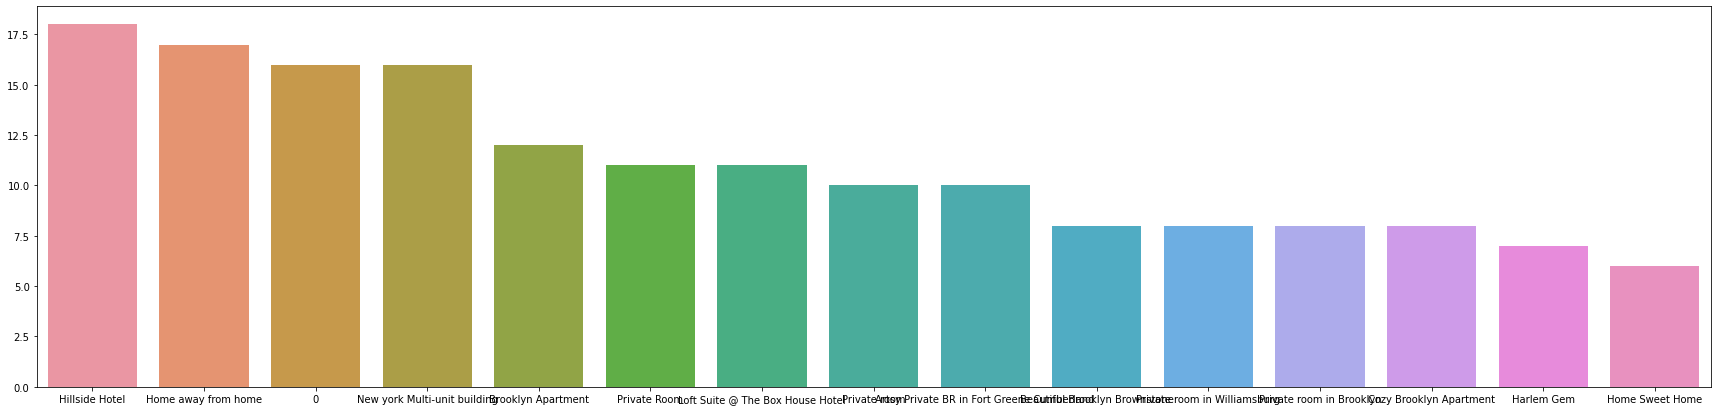

In [ ]:
#Getting r=thr graphs for top 15 names in the dataset.Plotting the graph for all the names make the graph so dense and unreadable so, slicing it.
name=df.name.value_counts()[:15]
plt.figure(figsize=(30,7))
sns.barplot(y=name.values,x=name.index)

So as we can see that hillside hotel chain is one of the most popular one followed  by home away from home.

## host_name

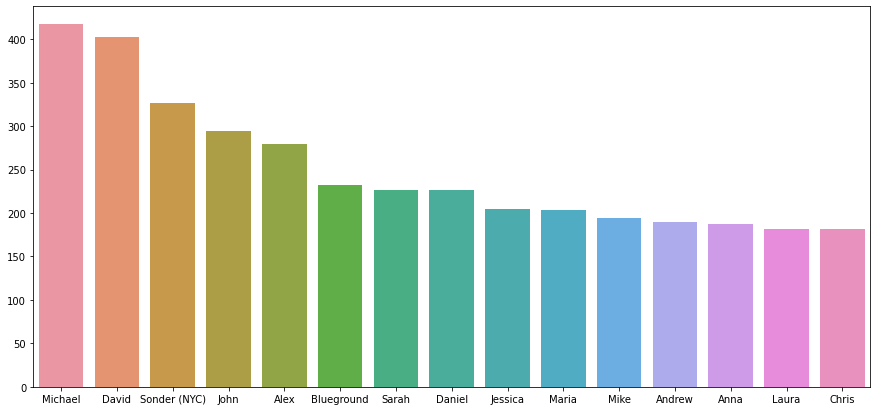

In [ ]:
#Getting the graph for top 15 host in the dataset. Plotting all the  names makes the graph so dense and unreadable.
host=df.host_name.value_counts()[:15]
plt.figure(figsize=(15,7))
sns.barplot(y=host.values,x=host.index)

Michael is the most popular host here, followed by david and then sonder(NYC).

## neighbourhood_group

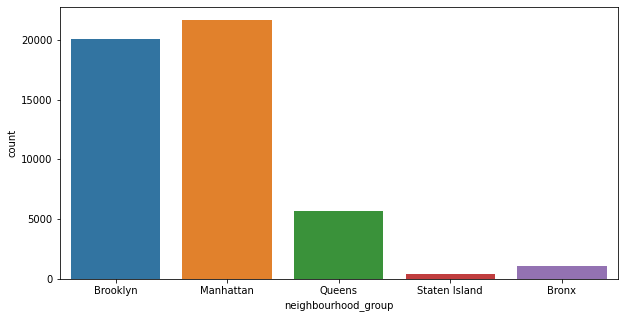

In [ ]:
#Neighbourhood group with the number of bookings.
plt.figure(figsize=(10,5))
sns.countplot(x="neighbourhood_group", data=df)


Manhattan is having highest number of listings and staten island is having the lowest.From here we can also say that manhattan is busiest city among all and staten island is the least busiest one.

## neighbourhood

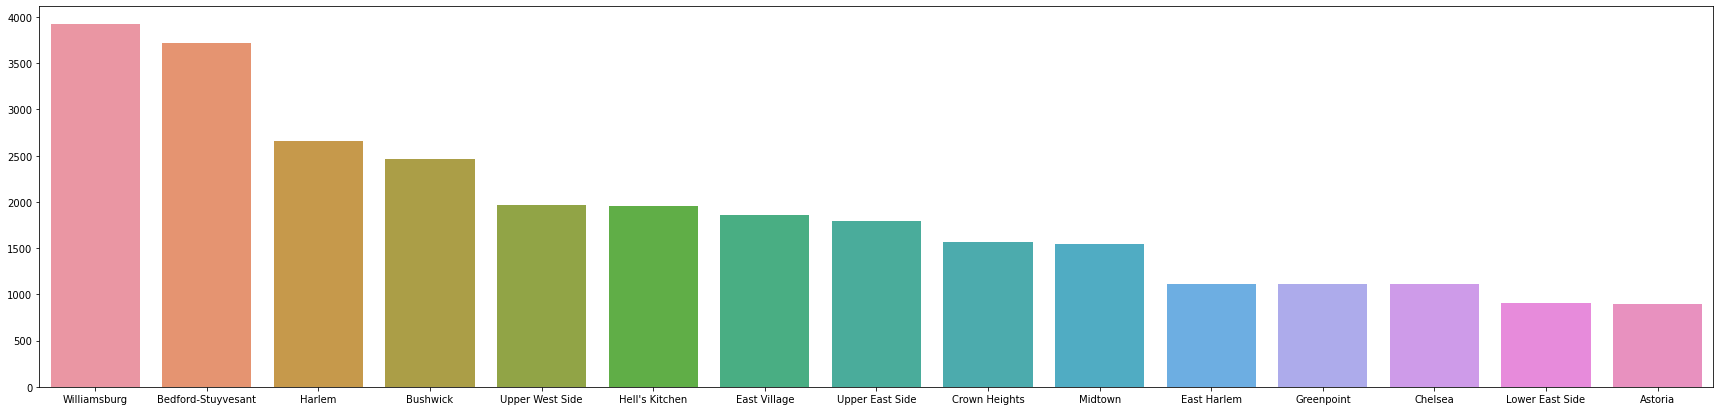

In [ ]:
#Top 15 neighbourhood with the highest number of booking.Crafting the output in the presenatble form using slicing feature of python here.
neighbourhood=df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(30,7))
sns.barplot(y=neighbourhood.values,x=neighbourhood.index)

By analysing top 15 neighbourhood we found that Williamsburg is one of the busiest neighbourhood folowed by bedford - stuyvesant . After that we see a considerable drop to harlem. After herlam the count gets lower further at upper west side then east village then crown height and last at east harlem.

## Room type

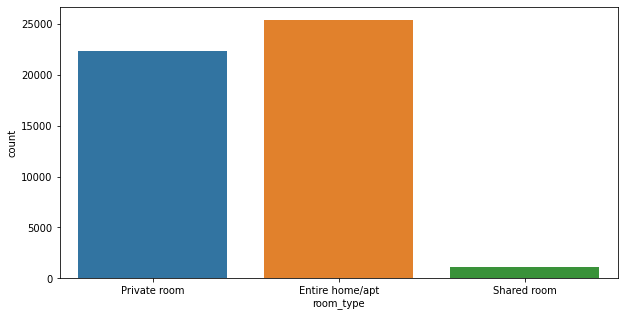

In [ ]:
#Which type of rooms are being booked by people.
plt.figure(figsize=(10,5))
sns.countplot(x="room_type", data=df)

We have highest number of listing for entire appartment room type followed by private rooms. Shared rooms are least here.

## Last Review

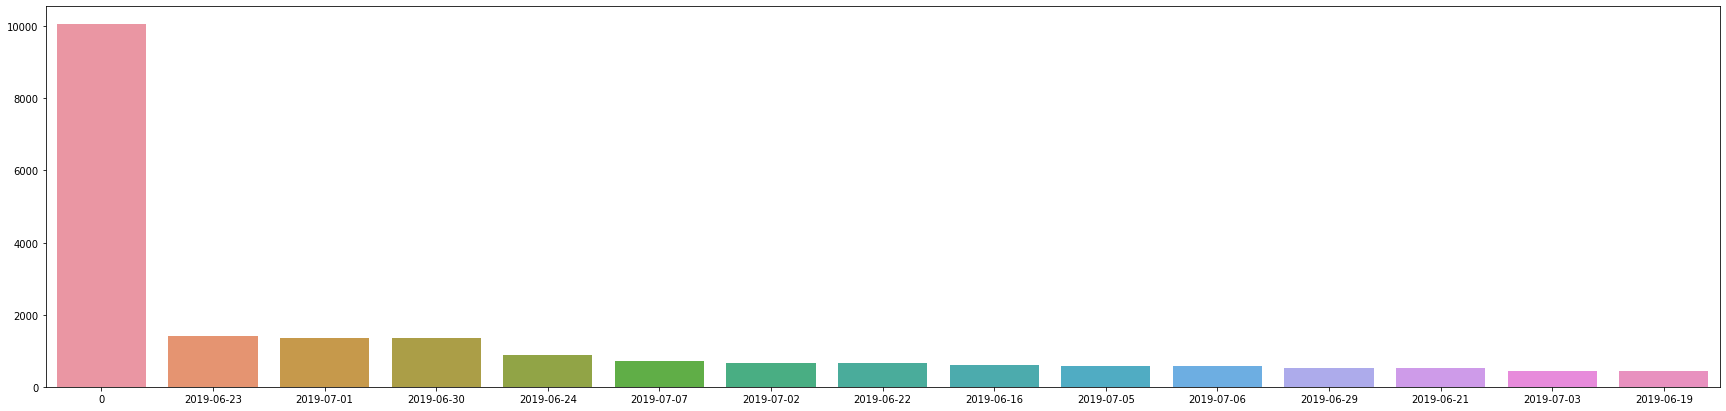

In [ ]:
#Last review received by different accomodations, we see last_review highest here as we imputed the missing values with that which further means that last_review is having mostly null values.
review=df.last_review.value_counts()[:15]
plt.figure(figsize=(30,7))
sns.barplot(y=review.values,x=review.index)

We have replaced null value with 0 and we can see that most of the value here is null. And rest there is not much of the change in top 15 last_review counts

## Monthly Review

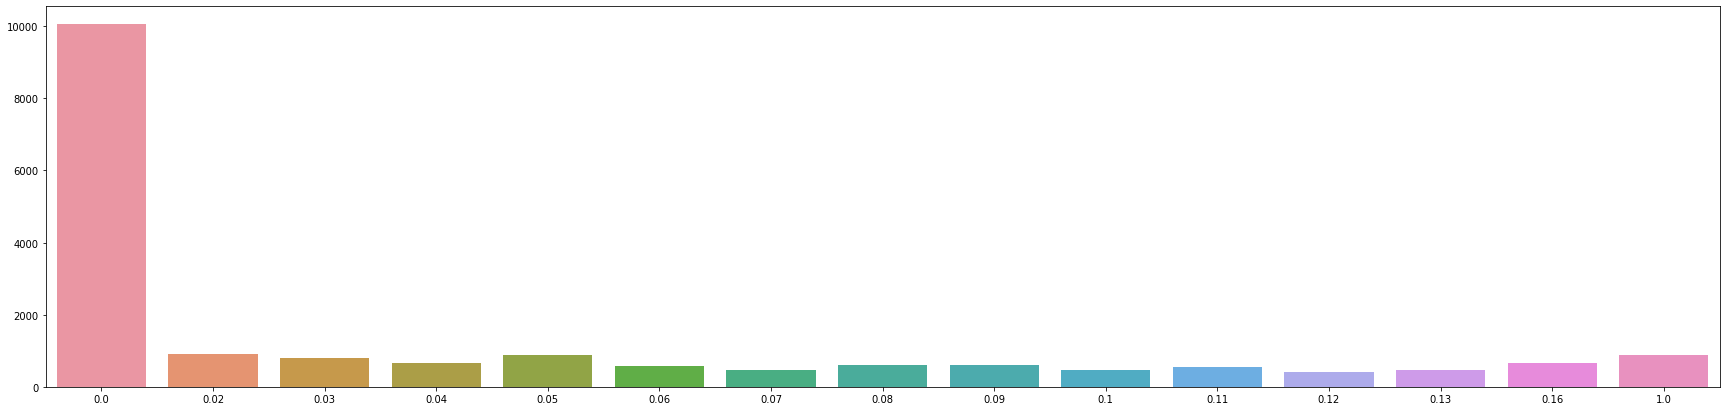

In [ ]:
#Monthly review received by different accomodations, we see last_review highest here as we imputed the missing values with that which further means that Monthly review is having mostly null values.
month=df.reviews_per_month.value_counts().head(15)
plt.figure(figsize=(30,7))
sns.barplot(y=month.values,x=month.index)

Same story as that of last review.

# <b> Numerical Variable

In [ ]:
#Let's see what our numerical data contains.
n=df.describe().columns.unique()
n




Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Price

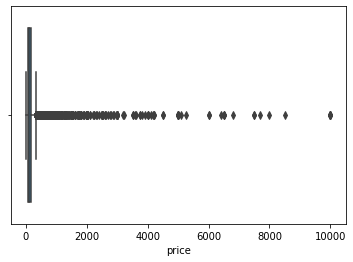

In [ ]:
#Analyzing the price variable using countplot as well as boxplot.

sns.boxplot(data = df, x='price')

We observe that the minimum value of price is 0 here which is not possible and we see many values lies in outlier region so let's remove them.

In [ ]:
df=df[df['price']>0]

In [ ]:
#Inter quartile Range calculation and execution.
IQR=df['price'].quantile(0.75)-df['price'].quantile(0.25)
Upper_limit = df['price'].quantile(0.75)+1.5*IQR
df=df[df['price']<Upper_limit]

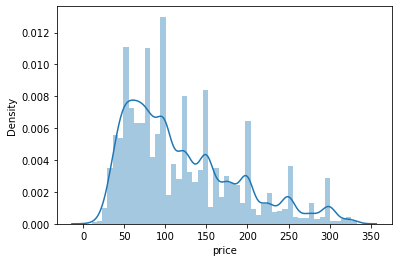

In [ ]:
#distribution
sns.distplot(df['price'])

So it looks like a normal distribution.

## minimum_nights

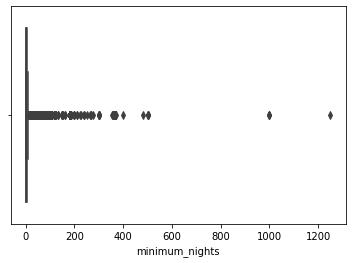

In [ ]:
#Analyzing the minimum_nights variable using countplot as well as boxplot.

sns.boxplot(data = df, x='minimum_nights')

So here we see that the minimum value is 0 which is a possible value. Many values are in the Outlier region so let's remove that.


In [ ]:
#Inter quartile Range calculation and execution.
IQR_mn=df['minimum_nights'].quantile(0.75)-df['minimum_nights'].quantile(0.25)
Upper_limit_mn = df['minimum_nights'].quantile(0.75)+1.5*IQR_mn
df=df[df['minimum_nights']<Upper_limit_mn]

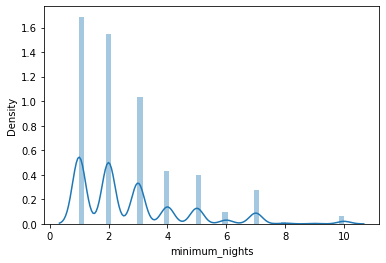

In [ ]:
#distribution
sns.distplot(df['minimum_nights'])

The data distribution looks less skewed and its shows normal kind of distribution on multiple peak values.

## number_of_reviews

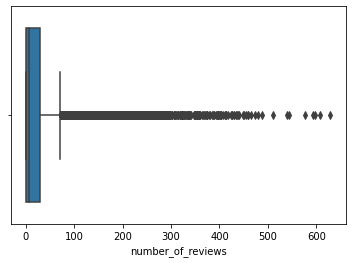

In [ ]:
#Analyzing number of reviews using countplot as well as boxplot.

sns.boxplot(data = df, x='number_of_reviews')

The minimum number of reviews is 0 and many data points lies in outlier region.

In [ ]:
##Inter quartile Range calculation and execution.
IQR_nr=df['number_of_reviews'].quantile(0.75)-df['number_of_reviews'].quantile(0.25)
Upper_limit_nr = df['number_of_reviews'].quantile(0.75)+1.5*IQR_nr
df=df[df['number_of_reviews']<Upper_limit_nr]

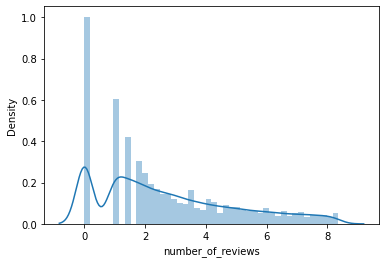

In [ ]:
#Distribution of reviews_per_month.
sns.distplot(np.sqrt(df['number_of_reviews']))

After IQR treatment the distribution looks like normal distribution slightly now.

In [ ]:
#n

## reviews_per_month

In [ ]:
#df.head()

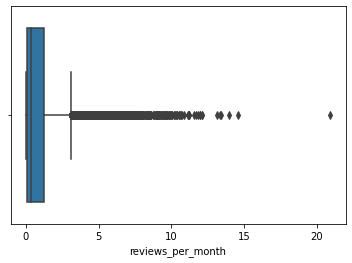

In [ ]:
#Analyzing reviews_per_month using countplot as well as boxplot.


sns.boxplot(data = df, x='reviews_per_month')


We see some values are less than 0 which is not possible so they are clearly an outlier. We see many values lies in outlier region so let's fix that.

In [ ]:
#Inter quartile Range calculation and execution.

IQR_rpm=df['reviews_per_month'].quantile(0.75)-df['reviews_per_month'].quantile(0.25)
Upper_limit_rpm = df['reviews_per_month'].quantile(0.75)+1.5*IQR_rpm
df=df[df['reviews_per_month']<Upper_limit_rpm]

## reviews_per_month distribution

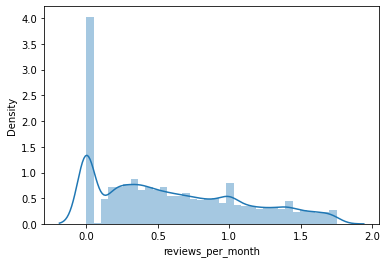

In [ ]:
#Distribution of reviews_per_month.
sns.distplot(np.sqrt(df['reviews_per_month']))

Here after iqr treatment,tranformation has been done and now the distribution looks more normal. 

## availability_365

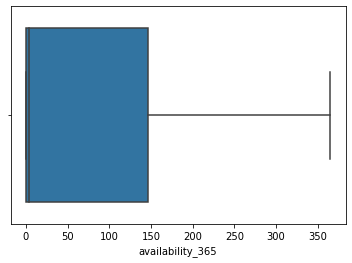

In [ ]:
#Analyzing availability_365 using countplot as well as boxplot.
sns.boxplot(data = df, x='availability_365')

We see that the value start from 0 here and goes up to more than 350 . The value of 0 is not possible in general case .Here we don't see any value in outlier region.

In [ ]:
df=df[df['availability_365']>0]

## availability_365 summary

In [ ]:
#Summary of availability_365.
df['availability_365'].describe()

count    17003.000000
mean       157.740164
std        128.064592
min          1.000000
25%         37.000000
50%        127.000000
75%        287.000000
max        365.000000
Name: availability_365, dtype: float64

Mean>median so the data is positively skewed .The std value suggest that the data is spread out here.

## availability_365 distribution

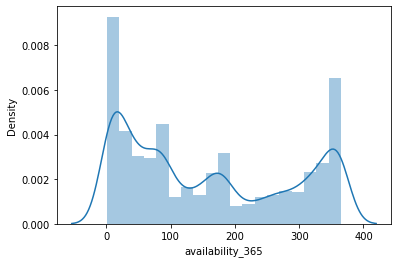

In [ ]:
#Distribution of availability_365.
sns.distplot(df['availability_365'])

The data distribution here is having multiple peak and not that skewed.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0,0.00,2,249


# <b> Bivariate Analysis (Catagorical vs Catagorical)









In [ ]:
#Getting list of catagorical variables.
c=df.describe(include=['object','category']).columns
c

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [ ]:
#Saving top 5 host names into a new dataframe.
h=df['host_name'].value_counts()[:5]
h_df=pd.DataFrame(h)
h_df

,host_name
Sonder (NYC),129
John,121
Michael,115
David,110
Maria,92


In [ ]:
#Filtering the dataset to get the details associated with top 5 host names only.
df_host=df[(df['host_name']=='Michael') | (df['host_name']=='David') | (df['host_name']=='Sonder (NYC)') | (df['host_name']=='John') | (df['host_name']=='Alex') ] 


## host_name vs neighbourhood_group

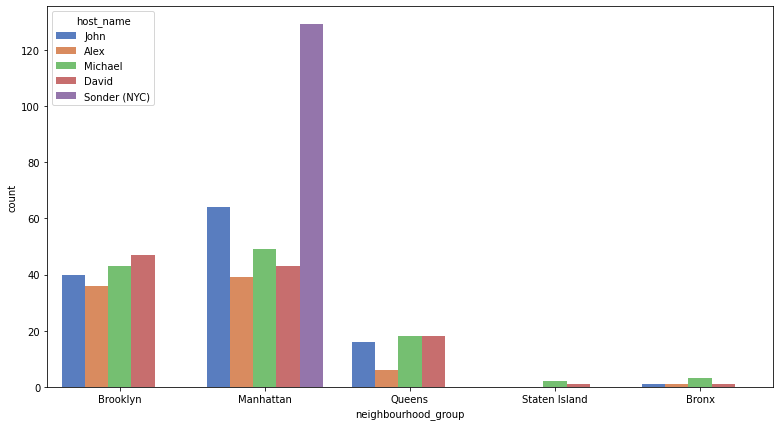

In [ ]:
#Analysing top 5 most popular hosts with neighbourhood_group.

plt.figure(figsize=(13,7))
sns.countplot(df_host.neighbourhood_group,hue=df_host.host_name, palette="muted")
plt.show()

In Brooklyn Micheal is having highest share, in Manhattan Sonder is taking the lead.In Queens David the king. in bronx Micheal is having highest numbers and in Staten Island David and Micheal both are on equal share almost.

In [ ]:
#c

## host_name vs room_type

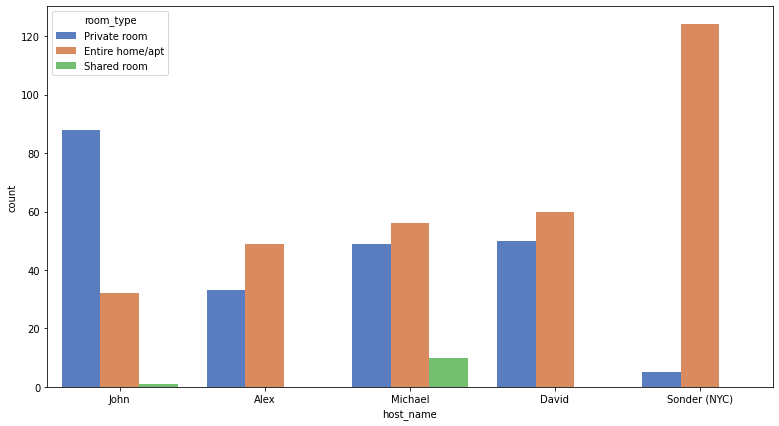

In [ ]:
#Analyzing the top 5 most popular hosts with the type of rooms they listed.
plt.figure(figsize=(13,7))
sns.countplot(df_host.host_name,hue=df_host.room_type, palette="muted")
plt.show()

John is having most of the private rooms listings.
Micheal, Alex,David and sonder is having highest number of appartment tye rooms listed.
Sonder is not having any shared type room listed and rest everyone is having the least number of shared room type listed.




In [ ]:
#c

## neighbourhood_group vs room_type

In [ ]:
#Analyzing the type of rooms present in different regions.
import plotly.offline as pyo
import plotly.graph_objs as go
#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
#Group the room type using 'neighbourhood_group' as an index
airbnb_types=df.groupby(['neighbourhood_group', 'room_type']).size()
#Create function to plot room type proportion on all region area
for region in df.neighbourhood_group.unique():
    
    #plt.figure(figsize=(24,12))
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    #plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region , marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1


Brroklyn, Manhattan, Bronx and Staten Island has highest number of appartment type of room listings.
Queens is having Private types of room listed more than other types.
Brooklyn, Manhattan and Queens have least number of shared room type whereas Bronx and Staten Island is not having any shared room type listed.

In [ ]:
#c

In [ ]:
#Getting the name of top 5 neighbourhood by count.
df['neighbourhood'].value_counts()[:5]

Bedford-Stuyvesant    1390
Williamsburg          1195
Harlem                1025
Bushwick               844
Hell's Kitchen         606
Name: neighbourhood, dtype: int64

In [ ]:
#Filtering the dataset to get the details associated to top 5 neighbourhood only.
df_n=df[(df['neighbourhood']=='Williamsburg ') | (df['neighbourhood']=='Bedford-Stuyvesant') | (df['neighbourhood']=='Harlem') | (df['neighbourhood']=='Bushwick') | (df['neighbourhood']=='Upper West Side') ] 


## neighbourhood vs host_name

<Figure size 936x504 with 0 Axes>

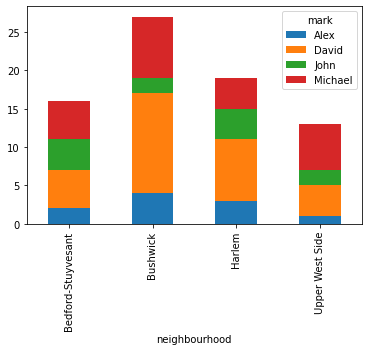

In [ ]:
#Stacked bar graph between neighbourhood vs host_name.
plt.figure(figsize=(13,7))
pd.crosstab(df_n['neighbourhood'],df_host['host_name']).plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

In Bedford-Stuyvesant Michael owns most number of properties followed by David then john and Alex is having least number of properties here where John>Alex.

In Bushwick Michael owns most number of properties followed by David then john and Alex is having least number of properties here where John>Alex.

In Harlem David owns most of the property followed by john and then Michael . Alex is the least of all here.

In Upper West Side David is leading followed by Michael then john. Alex is the least of all here .



In [ ]:
#c

## neighbourhood vs room_type

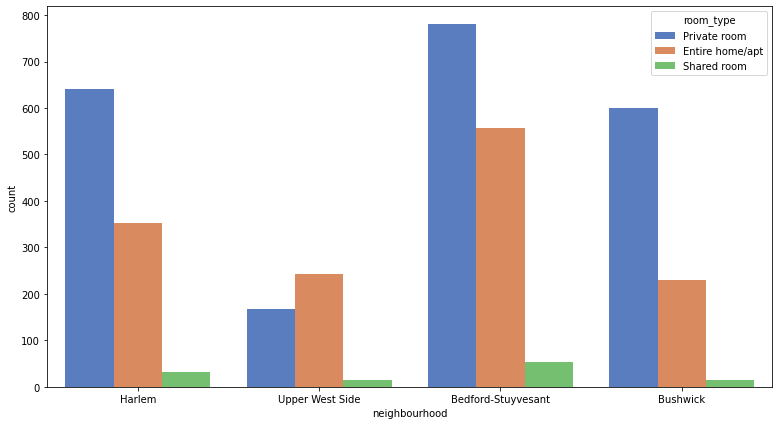

In [ ]:
#Analyzing the top 4 most popular neighbourhood with the type of rooms listed.
plt.figure(figsize=(13,7))
sns.countplot(df_n.neighbourhood,hue=df_n.room_type, palette="muted")
plt.show()

Harlem,Bedford-Stuyvesant , Bushwick is having Private room type listing more than any other type.
Upper West Side is having Appartment type of room listing more.




In [ ]:
#c

## <b> Bivariate Analysis (Numerical vs Numerical)

In [ ]:
#Getting the list of numerical data in the dataset
df.describe().columns.unique()


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## minimum_nights vs price

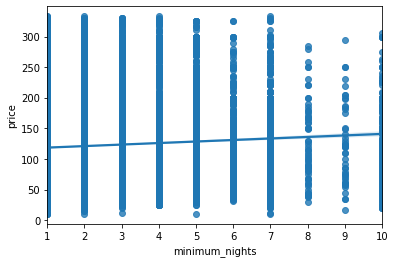

In [ ]:
#Regplot between minimum_nights vs price.
sns.regplot(x = 'minimum_nights', y = 'price', data = df)

We see a slight trend here that as the minimum_nights increases price increases.

## number_of_reviews vs price

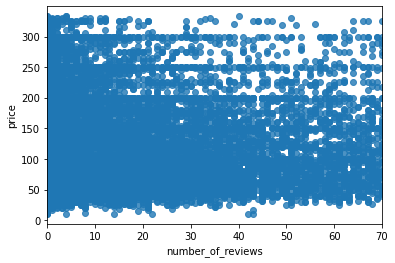

In [ ]:
#Regplot between number_of_reviews  vs price.

sns.regplot(x = 'number_of_reviews', y = 'price', data = df)

We don't see any significant trend between the price and the number of reviews.


## calculated_host_listings_count vs price

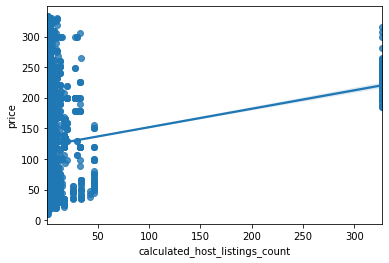

In [ ]:
#Regplot between calculated_host_listings_count vs price.

sns.regplot(x = 'calculated_host_listings_count', y = 'price', data = df)

We see a very slight increasing trend between price and calculated_host_listing_count .

## availability_365 vs price

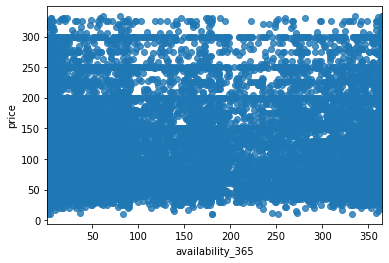

In [ ]:
#Regplot between availability_365 vs price.

sns.regplot(x = 'availability_365', y = 'price', data = df)

We don't see any trend between price and avalability_365.

## number_of_reviews vs minimum_nights

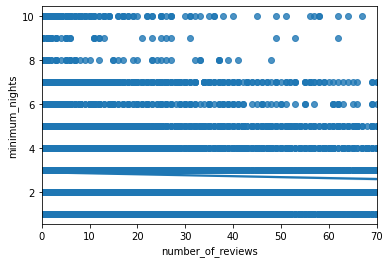

In [ ]:
#Regplot between number_of_reviews vs minimum_nights.

sns.regplot(x = 'number_of_reviews', y = 'minimum_nights', data = df)

We don't see any trend between minimum_nights and number_of_reviews.

## reviews_per_month vs minimum_nights


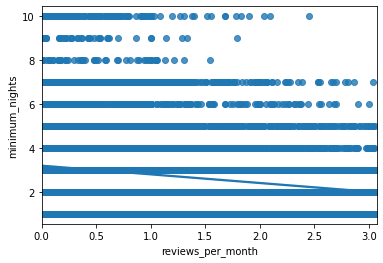

In [ ]:
#Regplot between reviews_per_month vs minimum_nights.

sns.regplot(x = 'reviews_per_month', y = 'minimum_nights', data = df)

we see a negative trend between minimum_nights and reviews_per_month.

## calculated_host_listings_count vs minimum_nights

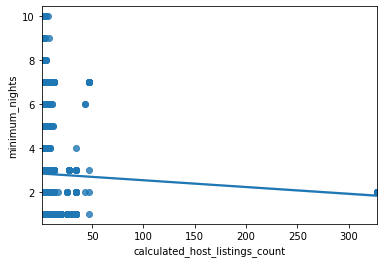

In [ ]:
#Regplot between calculated_host_listings vs minimum_nights.

sns.regplot(x = 'calculated_host_listings_count', y = 'minimum_nights', data = df)

There is a slight positive trend line between minimum_nights and calculated_host_listing_count.

## availability_365 vs minimum_nights

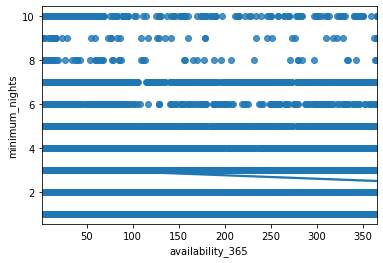

In [ ]:
#Regplot between availability_365 vs minimum_nights.

sns.regplot(x = 'availability_365', y = 'minimum_nights', data = df)

There is no trend observed between minimum_nights and availability_365.

## reviews_per_month vs number_of_reviews

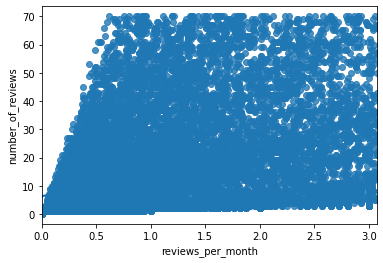

In [ ]:
#Regplot between reviews_per_month vs number_of_reviews.

sns.regplot(x = 'reviews_per_month', y = 'number_of_reviews', data = df)

We see strong trend between number_of_reviews and reviews_per_month because they are almost the same kind of thing.

## calculated_host_listings_count vs number_of_reviews



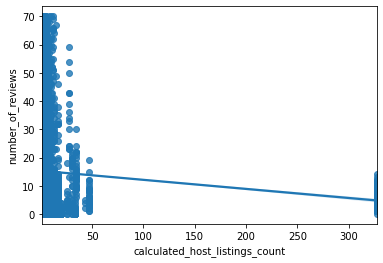

In [ ]:
#Regplot between calculated_host_listings_count vs number_of_reviews.

sns.regplot(x = 'calculated_host_listings_count', y = 'number_of_reviews', data = df)

We see a negative trend between calculates_host_listing_counts and number_of_reviews.

## availability_365 vs number_of_reviews

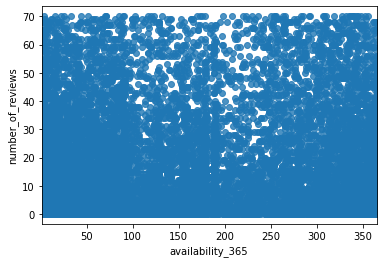

In [ ]:
#Regplot between availability_365 vs number_of_reviews.

sns.regplot(x = 'availability_365', y = 'number_of_reviews', data = df)

There is no trend between number_of_reviews and availability_365.

## availability_365 vs calculated_host_listings_count

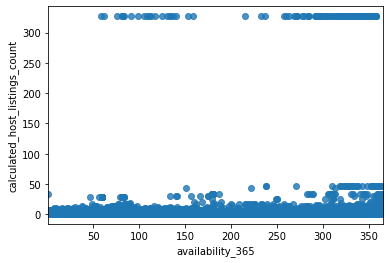

In [ ]:
#Regplot between availability_365 vs calculated_host_listing_count.

sns.regplot(x = 'availability_365', y = 'calculated_host_listings_count', data = df)

No trend observed between calculated_host_listing_count and availability_365.

## <b> Bivariate Analysis (Categorical vs Numerical)

In [ ]:
#c

In [ ]:
#Getting list of numerical features.
b=df.describe().columns.unique()
b


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#Getting the top 10 highest price from our dataset.
df_hn=df.nlargest(10, ['price'])

## host_name vs price

In [ ]:
df_hn

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13798,10403199,Mid-Century Museum Sleepover,29065752,Cullen,Brooklyn,Williamsburg,40.71863,-73.94528,Entire home/apt,333,7,0,0,0.00,1,365
19641,15728780,"SOMMwhere in NYC/ a unique, conscious artists ...",148108,Fatima,Manhattan,Lower East Side,40.72297,-73.98946,Private room,333,1,40,2019-06-10,1.27,2,62
38565,30327469,Parisian Palace in Heart of Manhattan,224001464,Aleszea,Manhattan,Chelsea,40.73734,-73.99327,Entire home/apt,333,4,4,2019-05-29,1.41,1,80
45303,34659944,Five-star luxury Apt in Chelsea !,152747338,Paola,Manhattan,Chelsea,40.74674,-74.00316,Entire home/apt,333,1,4,2019-06-30,2.35,1,365
48567,36315904,Your Private Duplex Mansion in the HEART of NYC!,269146714,Clinton,Manhattan,West Village,40.73670,-74.00105,Entire home/apt,333,2,0,0,0.00,1,336
46439,35252509,CHELSEA CENTRAL LUXURY 2BATHS,184520918,Danilo & Larissa,Manhattan,Chelsea,40.74575,-74.01052,Entire home/apt,332,1,0,0,0.00,1,361
1356,594732,Greenwich Village Skylit 1BR +deck!,2938302,Chris,Manhattan,Greenwich Village,40.73474,-73.99527,Entire home/apt,331,7,0,0,0.00,1,189
1566,710283,"Sunny, Large & Lovely in Greenpoint",283215,Isabelle,Brooklyn,Greenpoint,40.72582,-73.95213,Entire home/apt,330,3,51,2019-06-22,0.62,1,19
4672,3278436,UWS 2 BR 2 Ba. Gorgeous Apt!,7105630,Christine,Manhattan,Upper West Side,40.78206,-73.97797,Entire home/apt,330,4,11,2017-11-25,0.18,1,260
11031,8521692,Location! Large 1 bedroom oasis w elevator,3321346,Jade,Manhattan,East Village,40.72903,-73.98938,Entire home/apt,330,3,12,2018-11-22,0.32,1,58


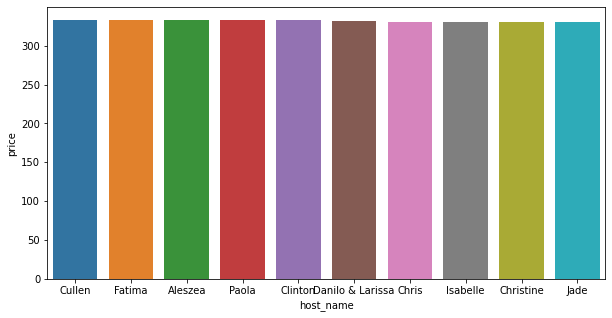

In [ ]:
#baplot between host_name vs price.
plt.figure(figsize=(10,5))
sns.barplot(x="host_name",y='price',data=df_hn)


These are the top 10 most expensive hosts and all of them are having the same price.

## host_name vs minimum_nights

In [ ]:
#Getting 10 highest number of minimumn_nights.
df_m=df.nlargest(10, ['minimum_nights'])

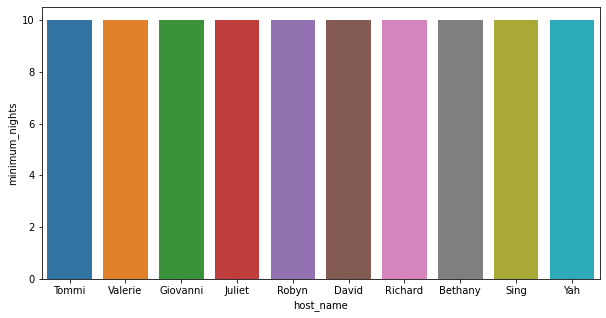

In [ ]:
#baplot between host_name vs minimum_nights.

plt.figure(figsize=(10,5))
sns.barplot(x="host_name",y='minimum_nights',data=df_m)

These are the top 10 hosts offering the highest minimum night stay 

In [ ]:
#b,c

## host_name vs number_of_reviews

In [ ]:
#Ten highest number of reviews.
df_r=df.nlargest(10, ['number_of_reviews'])

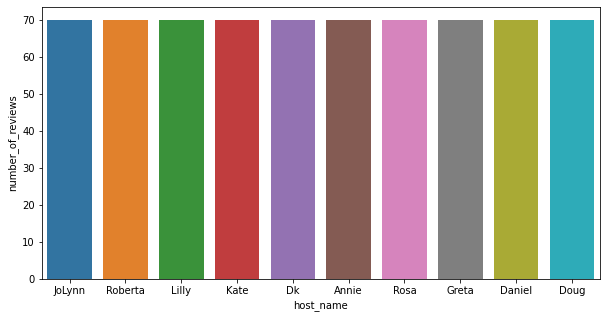

In [ ]:
#baplot between host_name vs number_of_reviews.

plt.figure(figsize=(10,5))
sns.barplot(x="host_name",y='number_of_reviews',data=df_r)

Top 10 most reviewed hosts.

## host_name vs reviews_per_month

In [ ]:
#Top 10 highest reviews per month.
df_rm=df.nlargest(10, ['reviews_per_month'])

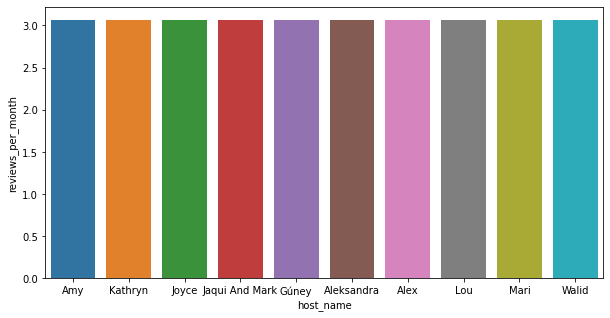

In [ ]:
#baplot between host_name vs reviews_per_month.

plt.figure(figsize=(10,5))
sns.barplot(x="host_name",y='reviews_per_month',data=df_rm)

In [ ]:
#c,b

In [ ]:
#Calculating 1000 highest calculated host listing count.
df_lc=df.nlargest(500, ['calculated_host_listings_count'])

## host_name vs calculated_host_listings_count

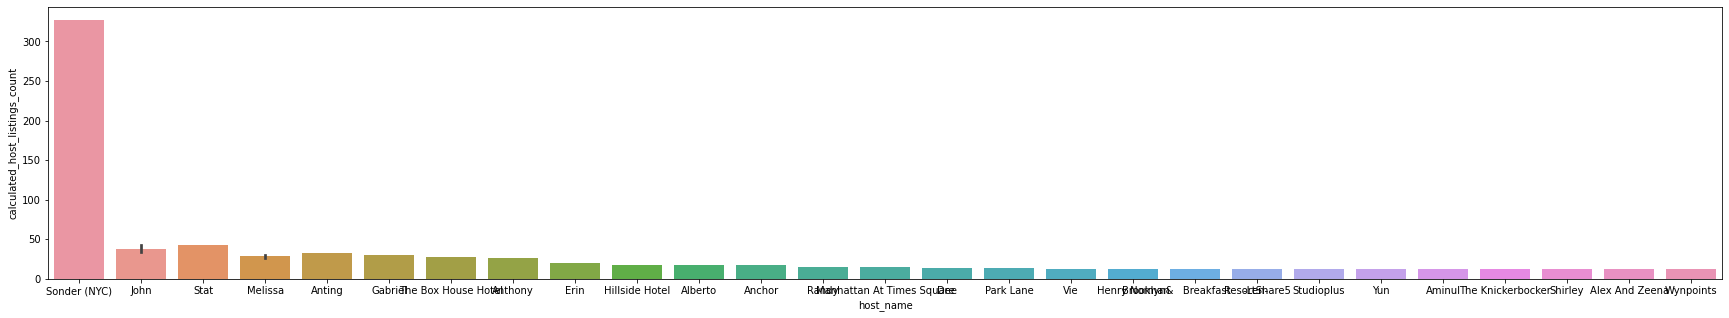

In [ ]:
#baplot between host_name vs calculated_host_listing_count.

plt.figure(figsize=(30,5))
sns.barplot(x="host_name",y='calculated_host_listings_count',data=df_lc)

Sonder is here is having a very high number of calculated host listing count then any of other here .

## host_name vs availability_365

In [ ]:
#Top 10 highest number of availability.
df_av=df.nlargest(10, ['availability_365'])

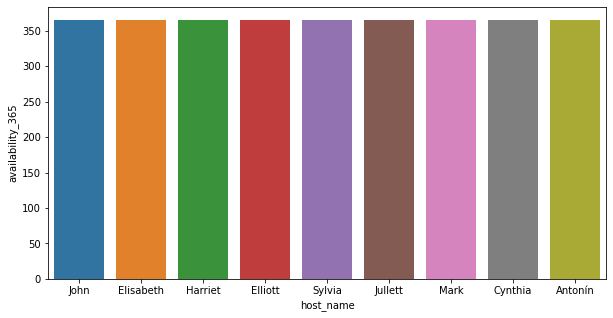

In [ ]:
#baplot between host_name vs availability_365.

plt.figure(figsize=(10,5))
sns.barplot(x="host_name",y='availability_365',data=df_av)

So many hosts are available for 365 days and thats the highest number of availability.

In [ ]:
#c,b

## neighbourhood_group vs price 

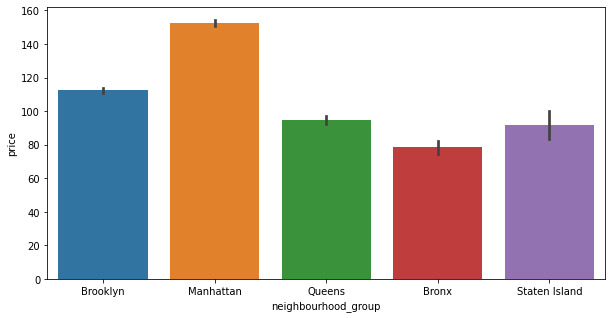

In [ ]:
#baplot between neighbourhood_group vs price.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='price',data=df)

Manhattan is most expensive followed by Brooklyn then Staten Island followed by Queens. Bronx is the least expensive locality.

## neighbourhood_group vs minimum_nights

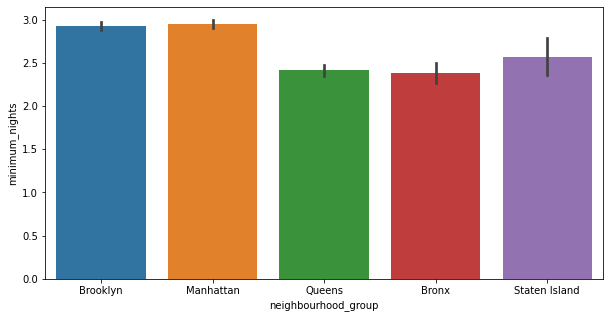

In [ ]:
#baplot between neighbourhood_group vs minimum_nights.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='minimum_nights',data=df)

Manhattan is getting highest number of night booking followed by brooklyn . Then Queens followed by Staten Island. Bronx is getting the least number of night bookings here.

## neighbourhood_group vs number_of_reviews

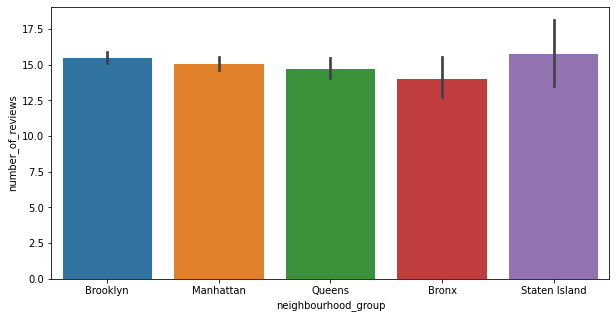

In [ ]:
##baplot between neighbourhood_group vs number_of_reviews.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='number_of_reviews',data=df)

Staten island is the locality getting highest number of reviews followed by Queens. Then Bronx followed by Brooklyn and manhattan is getting the least number of reviews here.

In [ ]:
#c,b

## neighbourhood_group vs reviews_per_month

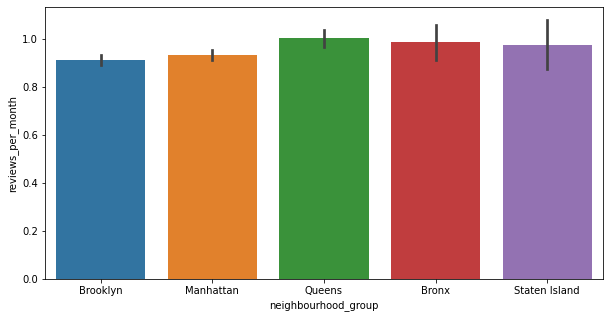

In [ ]:
##baplot between neighbourhood_group vs reviews_per_month.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='reviews_per_month',data=df)

Queens is receiving highest number of reviews per month followed by Staten island and then Bronx. Brooklyn and Manhattan are getting almost equal number of reviews and least of all.

## neighbourhood_group vs calculated_host_listings_count

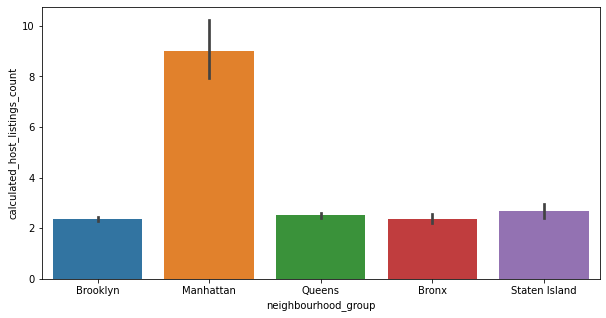

In [ ]:
#baplot between neighbourhood_group vs calculated_host_listings_count.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='calculated_host_listings_count',data=df)

Manhattan is having highest calculated host listing count followed by Queens. Then Brooklyn followed by Staten Island. Bronx is having the least number of calculated host listing count.

## neighbourhood_group vs availability_365

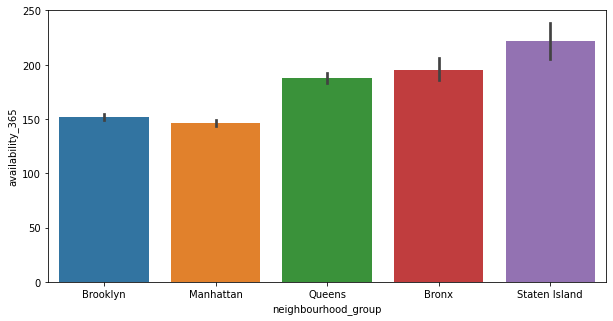

In [ ]:
#baplot between neighbourhood_group vs availability_365.

plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group",y='availability_365',data=df)

Staten Island is having highest number of availability followed by Bronx. Then Queens followed by Manhattan. Brooklyn is having least number of availability


In [ ]:
#c,b

## neighbourhood vs price

In [ ]:
df_np=df.nlargest(10, ['price'])

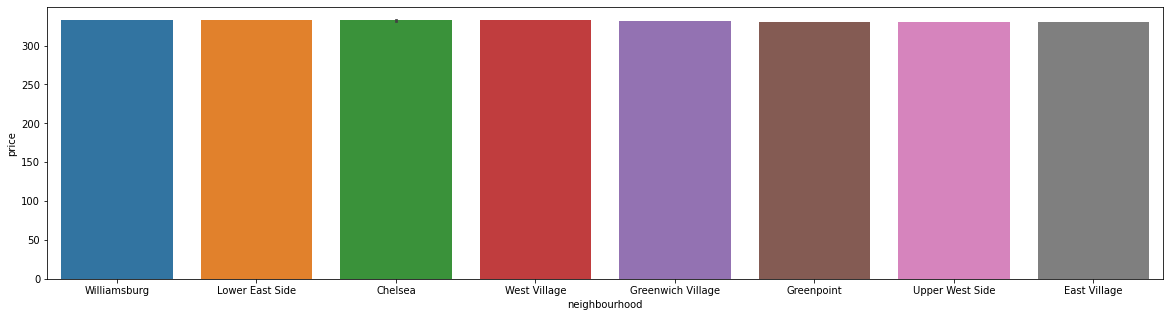

In [ ]:
#baplot between neighbourhood vs price.

plt.figure(figsize=(20,5))
sns.barplot(x="neighbourhood",y='price',data=df_np)

Astoria, Greenpoint, Upper West Side , East Herlam and Lower East Side are the most expensive neighbourhood.

## room_type vs price

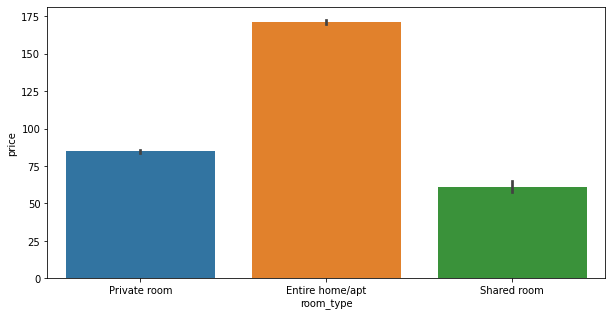

In [ ]:
#baplot between room_type vs price.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='price',data=df)

Entire apt is the most expensive one followed by Private room. Shared room is the least expensive accommodation.


## room_type vs minimum_nights

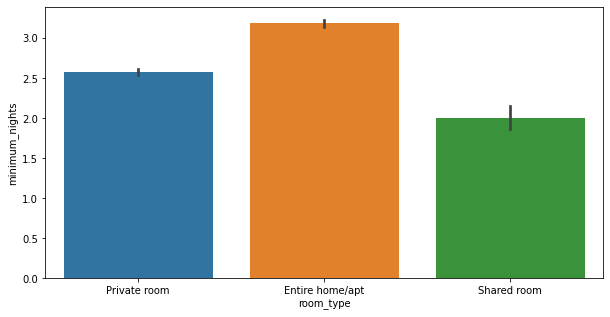

In [ ]:
#baplot between room_type vs price.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='minimum_nights',data=df)

Entire apartment is getting booked more than others for nights and shared room is getting more night bookings then private room.

## room_type vs number_of_reviews

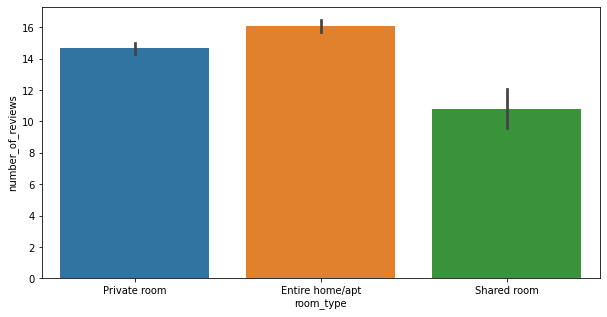

In [ ]:
#baplot between room_type vs number_of_reviews.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='number_of_reviews',data=df)

Private room is getting highest number of reviews followed by Entire apt and shared rooms are having least number of reviews.

## room_type vs reviews_per_month

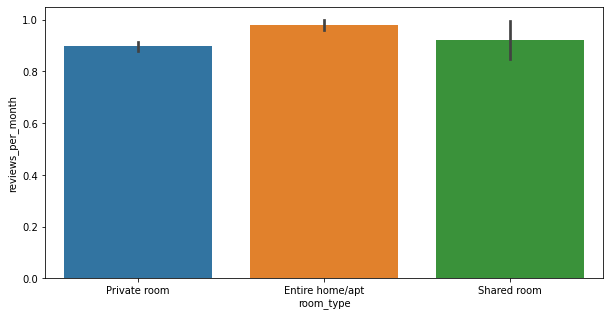

In [ ]:
#baplot between room_type vs reviews_per_month.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='reviews_per_month',data=df)

Shared room is getting highest number of reviews per month followed by Private room and Entire apt are having least number of reviews.

## room_type vs calculated_host_listings_count

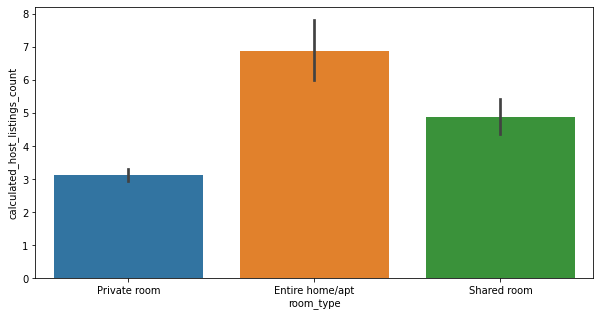

In [ ]:
#baplot between room_type vs calculated_host_listing_count.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='calculated_host_listings_count',data=df)

Entire home is having the highest Calculated host listing count followed by Shared room and private rooms are having the least number of calculated host listing count.

## room_type vs availability_365

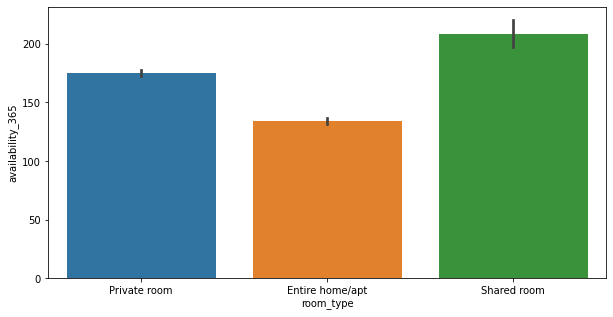

In [ ]:
#baplot between room_type vs availability_365.

plt.figure(figsize=(10,5))
sns.barplot(x="room_type",y='availability_365',data=df)

Shared rooms are having highest number of avalability. Entire apt and private rooms are having almost same number of avalability.


#Neighbourhood_group map

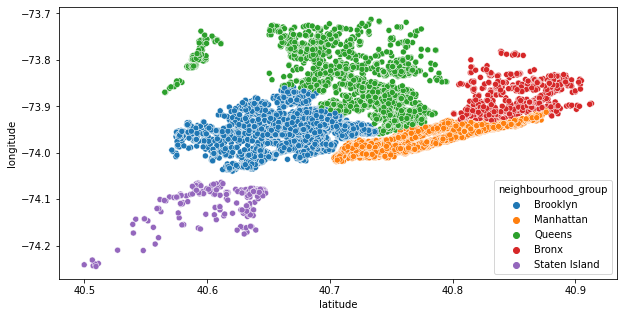

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue= df['neighbourhood_group'])

So from the graph we can say that Manhataan is having the highest number of listing and the listings in Manhattan city is very close to each other.

After Manhatnna Brooklyn is having the highest number of listings. The listings in Brooklyns are also close to each other but not as close as the Manhattan city.

After Brooklyn Queens is having the highest number of listings and here listings are not as close as in case of Manhattan or Brooklyn.

After Queens Bronx is having highest number of listings and listongs here are also close but not as close as Manhattan.

Staten Island is having least number of listings and they are quiet sprea around the space.




##<b>Conclusion

<b>What we can learn about different hosts and area ?</b>

Among the top 5 most popular hosts,John is having most of the private rooms listings. Micheal, Alex,David and sonder is having highest number of appartment tye rooms listed. Sonder is not having any shared type room listed and rest everyone is having the least number of shared room type listed.

<b> What we can learn from prediction? </b>

Minimum number of nights is affecting the prices as the minimum nights are increasing prices are increasing.

We don't see any significant trend between the price and the number of reviews.

We see a very slight increasing trend between price and calculated_host_listing_count .

There is no trend observed between minimum_nights and availability_365

<b>Which hosts are the busiest and why?</b>

Micheal, Sonder, David, Alex,John are the top 5 most number of listing counts.So they are the busiest host.

<b>Is there any noticeable difference of traffic among different areas and what could be the reason for it?</b>

The reason for this can be the degree of busyness of the location. For example Manhattan being the financial capital of the NYC is a very busy city so the demand of accomodations are huge and Staten Island is an Island where people genrally visit to have some good times so that's why demand of accomodation there is not as high as the Manhattan city.